<a href="https://colab.research.google.com/github/raushan9jnv/Face-emotion-Recognition/blob/main/Testing_model_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Method 2**

In [25]:
# importing zip file from my google drive and extracted it here.
from zipfile import ZipFile
filename = '/content/drive/MyDrive/Almabetter/Capstone project/Face emotion Recognition-Capstone project-5/Data/archive_FER2013_Dataset.zip'

# extract it
with ZipFile(filename , 'r') as zip:
  zip.extractall()
  print('Zip file extracted successfully')

Zip file extracted successfully


In [26]:
!pip install tensorflow

In [27]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [28]:
train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [29]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [30]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
448/448 [==============================] - 14s 27ms/step - loss: 1.8060 - accuracy: 0.2585 - val_loss: 1.7215 - val_accuracy: 0.3143
Epoch 2/50
448/448 [==============================] - 11s 24ms/step - loss: 1.6336 - accuracy: 0.3631 - val_loss: 1.5594 - val_accuracy: 0.4068
Epoch 3/50
448/448 [==============================] - 12s 26ms/step - loss: 1.5288 - accuracy: 0.4129 - val_loss: 1.4642 - val_accuracy: 0.4403
Epoch 4/50
448/448 [==============================] - 12s 27ms/step - loss: 1.4606 - accuracy: 0.4387 - val_loss: 1.4045 - val_accuracy: 0.4694
Epoch 5/50
448/448 [==============================] - 11s 24ms/step - loss: 1.3998 - accuracy: 0.4688 - val_loss: 1.3509 - val_accuracy: 0.4904
Epoch 6/50
448/448 [==============================] - 11s 24ms/step - loss: 1.3492 - accuracy: 0.4890 - val_loss: 1.3139 - val_accuracy: 0.5003
Epoch 7/50
448/448 [==============================] - 11s 24ms/step - loss: 1.3049 - accuracy: 0.5050 - val_loss: 1.2758 - val_accuracy:

In [31]:
from keras.models import model_from_json
model_json = emotion_model.to_json()
with open("/content/drive/MyDrive/Almabetter/Capstone project/Face emotion Recognition-Capstone project-5/Model3/model3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
emotion_model.save_weights("/content/drive/MyDrive/Almabetter/Capstone project/Face emotion Recognition-Capstone project-5/Model3/model3.hdf5")
print("Saved model3 to disk")

Saved model3 to disk


In [32]:
# Saving the whole emotion_model along with architecture in FER_model.h5
emotion_model.save('/content/drive/MyDrive/Almabetter/Capstone project/Face emotion Recognition-Capstone project-5/Model3/FER_model3.h5')
print('Model3 Saved')

Model3 Saved


In [33]:
!pip install keras

In [34]:
import keras

In [35]:
# saveBestModel = keras.callbacks.ModelCheckpoint('/best_model.hdf5', monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1,save_freq='epoch')

# 4.To Check our Model on Images

###4.1 Preparation for emotion recognition using photo

In [36]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()


###4.2 Model Loading

In [37]:
from keras.models import model_from_json
import numpy as np
import cv2

def load_model(path):

	json_file = open(path + 'model3.json', 'r')
	loaded_model_json = json_file.read()
	json_file.close()
	
	model = model_from_json(loaded_model_json)
	model.load_weights(path + "FER_model3.h5")
	print("Loaded model from disk")
	return model

In [38]:
#model loading
path = "/content/drive/MyDrive/Almabetter/Capstone project/Face emotion Recognition-Capstone project-5/Model3/"
model = load_model(path)

Loaded model from disk


###4.3 Defining function which will click images

In [39]:
#CODE for Capturing an image on Colab from here: https://colab.research.google.com/notebook#fileId=1OnUy6eFE7XhdfGfAHDCqQxpwueTOj_NO

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

###4.4 Use this to click *photo*

In [40]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

###4.5 Defining Function to crop face and analyszing photo taken

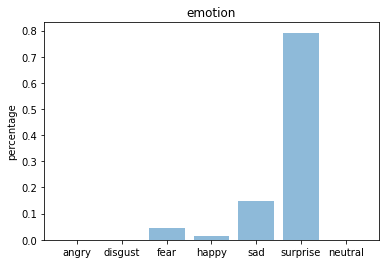

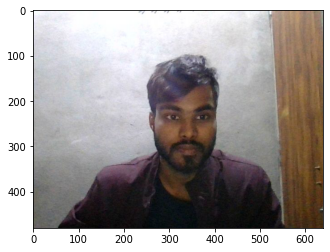

In [43]:
import cv2
            
def facecrop(image):  
    facedata = '/content/drive/MyDrive/Almabetter/Capstone project/Face emotion Recognition-Capstone project-5/Data/haarcascade_frontalface_alt.xml' 
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite('capture.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)

   


if __name__ == '__main__':
    facecrop('/content/photo.jpg')

#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = '/content/photo.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);


plt.imshow(true_image)
plt.show()
